<a href="https://colab.research.google.com/github/ZahraaSameerSabti/Final-project-/blob/colab/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn import model_selection,metrics,preprocessing,linear_model,tree,svm,datasets,neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Importing dataset

In [ ]:
data_df=pd.read_csv('/content/archive (2).zip')

In [ ]:
data_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Visualization of the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe56c40b710>,
      dtype=object)

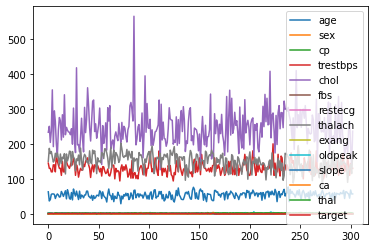

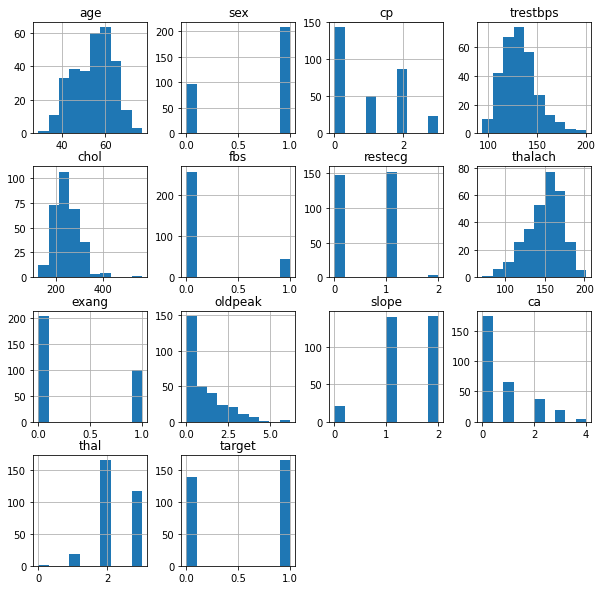

In [ ]:
data_df.plot()
data_df.hist(figsize=(10,10)) 

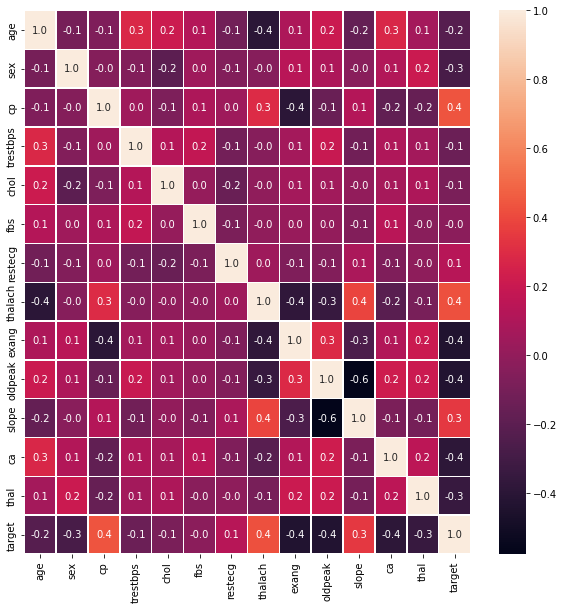

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

#preprocessing data

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Getting some information about the data
data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_df.size

4242

In [ ]:
data_df.shape

(303, 14)

In [ ]:
data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Separate the target column from the feature column
X=data_df.drop(columns='target', axis=1)
Y=data_df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
#normalize the values of X
X_normalizer=preprocessing.StandardScaler()
X_norm=X_normalizer.fit_transform(X)

# Split the dataset into a training/testing set

In [ ]:
np.random.seed(42)

In [ ]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X_norm,Y,test_size=0.1,random_state=42)

In [ ]:
X_train.shape

(272, 13)

In [ ]:
X_test.shape

(31, 13)

In [ ]:
Y_train.shape

(272,)

In [ ]:
Y_test.shape

(31,)

#DNN Model

In [ ]:
X_test=X_train[:30]
Y_test=Y_train[:30]
X_train=X_train[30:] 
Y_train=Y_train[30:]

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(13)),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.1), 
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.1),
                                   tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,name='output')

])

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 256)               3584      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
layer_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 69,633
Trainable params: 69,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [ ]:
model.fit(x=X_train,y=Y_train,batch_size=32,epochs=20,validation_data=(X_test,Y_test)) 

Epoch 1/20
8/8 [==============================] - 3s 36ms/step - loss: 0.5916 - accuracy: 0.7066 - val_loss: 0.2437 - val_accuracy: 0.9333
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.4245 - accuracy: 0.8430 - val_loss: 0.3075 - val_accuracy: 0.9000
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.3983 - accuracy: 0.8388 - val_loss: 0.3170 - val_accuracy: 0.9000
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8760 - val_loss: 0.2837 - val_accuracy: 0.9000
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.3197 - accuracy: 0.8636 - val_loss: 0.3048 - val_accuracy: 0.9000
Epoch 6/20
8/8 [==============================] - 0s 8ms/step - loss: 0.2829 - accuracy: 0.8926 - val_loss: 0.2762 - val_accuracy: 0.9333
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.2628 - accuracy: 0.9050 - val_loss: 0.2727 - val_accuracy: 0.9333
Epoch 8/20
8/8 [===============

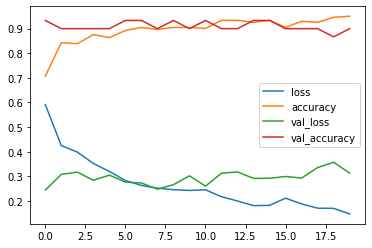

In [ ]:
hist_df=pd.DataFrame(model.history.history)
hist_df.plot()

In [ ]:
pred=model.predict(X_test)

In [ ]:
tf.math.round(np.array([Y_test]))

<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0]])>

In [ ]:
k=[]
thresholds =tf.math.round(pred) 


In [ ]:
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(Y_test,pred))
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.binary_crossentropy(Y_test,pred))
print('loss:',loss)
pr=metrics.precision_score(Y_test,thresholds,average='weighted')
print('pr:',pr)
re=metrics.recall_score(Y_test,thresholds,average='weighted')
print('re:',re)
confusion_matrix=metrics.confusion_matrix(Y_test,thresholds)

acc: tf.Tensor(0.0, shape=(), dtype=float32)
loss: tf.Tensor(2.4258962, shape=(), dtype=float32)
pr: 0.9017857142857143
re: 0.9


#Models of Machine learning

In [ ]:
# Creating class calculate scores
def model_score(Y_test,predict):
  
         accuracy=accuracy_score(Y_test,predict)
         recall=recall_score(Y_test,predict)
         precision=precision_score(Y_test,predict)
         f1=f1_score(Y_test,predict)
    
         metrics_dict={'accuracy':accuracy,
                        'recall':recall,
                         'precision':precision,
                        'f1':f1}
    
         print(f'accuracy:{accuracy}')
         print(f'recall:{recall}')
         print(f'precision:{precision}')
         print(f'f1:{f1}')
    
         return metrics_dict


In [ ]:
Y_train_hot=tf.one_hot(Y_train,depth=len(set(Y_train)))
Y_test_hot=tf.one_hot(Y_test,depth=len(set(Y_train)))

In [ ]:
Y_train_hot[:10]

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [ ]:
X_test=X_train[:30]
Y_test=Y_train_hot[:30]
X_train=X_train[30:] 
Y_train_hot=Y_train_hot[30:]

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def kfold_train_test_split(X, Y, train_indices, test_indices):
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

In [ ]:
# splits the data 

shuffle_k_fold = model_selection.ShuffleSplit(n_splits=7, random_state=42)
# Empty array to store the scores
scores = [] 

In [ ]:
for  train_indices, test_indices in shuffle_k_fold.split(X): 
  # Split data using our predefined function
     X_train, X_test, Y_train, Y_test = kfold_train_test_split(X_norm, Y, train_indices, test_indices)


## Tree decision

In [ ]:
     tree_model=tree.DecisionTreeClassifier( )
     tree_model.fit(X_train,Y_train)
     # Predict using test set
     Y_pred = tree_model.predict(X_test)
     #Calculate scores
     print(model_score(Y_test,Y_pred))

accuracy:0.7741935483870968
recall:0.8235294117647058
precision:0.7777777777777778
f1:0.7999999999999999
{'accuracy': 0.7741935483870968, 'recall': 0.8235294117647058, 'precision': 0.7777777777777778, 'f1': 0.7999999999999999}


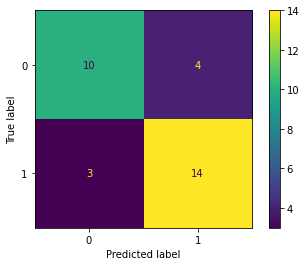

In [ ]:
     plot_confusion_matrix(tree_model,X_test, Y_test)

##SVM model

In [ ]:
     svc_model = svm.SVC()
     svc_model.fit(X_train,Y_train)
     # Predict using test set
     pred=svc_model.predict(X_test)
     # Calculate scores
     print(model_score(Y_test,pred))

accuracy:0.9032258064516129
recall:0.9411764705882353
precision:0.8888888888888888
f1:0.9142857142857143
{'accuracy': 0.9032258064516129, 'recall': 0.9411764705882353, 'precision': 0.8888888888888888, 'f1': 0.9142857142857143}


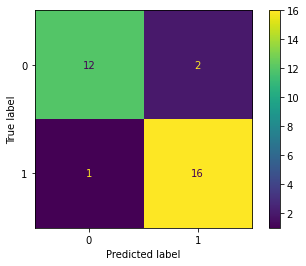

In [ ]:
     plot_confusion_matrix(svc_model,X_test, Y_test)

##KNN

In [ ]:
     # Train model
     eigh =neighbors.KNeighborsClassifier()
     eigh.fit(X_train, Y_train)
     # Predict using test set
     Y_pred=eigh.predict(X_test)
     # Calculate scores
     print(model_score(Y_test,Y_pred))

accuracy:0.8387096774193549
recall:0.8823529411764706
precision:0.8333333333333334
f1:0.8571428571428571
{'accuracy': 0.8387096774193549, 'recall': 0.8823529411764706, 'precision': 0.8333333333333334, 'f1': 0.8571428571428571}


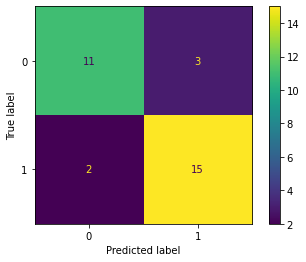

In [ ]:
     plot_confusion_matrix(eigh,X_test, Y_test)

## logistic regression

In [ ]:
     classifier1 = linear_model.LogisticRegression()
     classifier1.fit(X_train, Y_train)
     # Predict using test set
     Y_pred=classifier1.predict(X_test)
     # Calculate scores
     print(model_score(Y_test,Y_pred))
     


accuracy:0.8709677419354839
recall:0.9411764705882353
precision:0.8421052631578947
f1:0.8888888888888888
{'accuracy': 0.8709677419354839, 'recall': 0.9411764705882353, 'precision': 0.8421052631578947, 'f1': 0.8888888888888888}


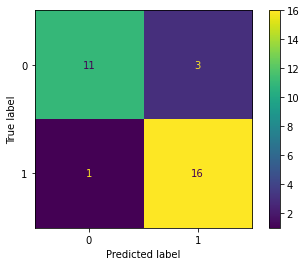

In [ ]:
     plot_confusion_matrix(classifier1,X_test, Y_test)

##Random forest

In [ ]:
     classifier=RandomForestClassifier(n_estimators=40 ,max_depth=4,random_state=42)
     classifier.fit(X_train, Y_train)
     # Predict using test set
     Y_pred=classifier.predict(X_test)
     # Calculate scores
     print(model_score(Y_test,Y_pred))
     


accuracy:0.9032258064516129
recall:0.9411764705882353
precision:0.8888888888888888
f1:0.9142857142857143
{'accuracy': 0.9032258064516129, 'recall': 0.9411764705882353, 'precision': 0.8888888888888888, 'f1': 0.9142857142857143}


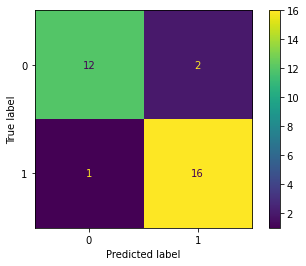

In [ ]:
     plot_confusion_matrix(classifier,X_test, Y_test)